# Goal
- Image pyramid란 이미지를 다양한 해상도로 표현하는 방법이다.
- cv.pyrUP() 함수를 사용하여 이미지를 확대하고 cv.pyrDown() 함수를 사용하여 이미지를 축소한다.

# Theory
이미지를 다른 해상도로 작업해야 하는 경우 이미지 피라미드를 사용할 수 있다. 이미지 피라미드는 이미지의 다양한 해상도를 나타내는 이미지의 컬렉션이다. 이미지 피라미드는 두 가지 유형이 있다.
1. Gaussian Pyramid
2. Laplacian Pyramid

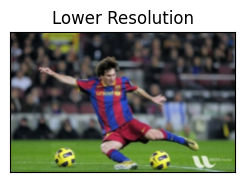

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Images/messi5.jpeg')
assert img is not None, "file could not be read, check with os.path.exists()"
lower_reso = cv.pyrDown(img)

# plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('Original')
# plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv.cvtColor(lower_reso, cv.COLOR_BGR2RGB)), plt.title('Lower Resolution')
plt.title('Lower Resolution'), plt.xticks([]), plt.yticks([])
plt.show()

## Image Blending using Pyramids
- 이미지 블렌딩은 두 이미지를 결합하는 기술이다. 이미지 블렌딩은 두 이미지의 경계를 부드럽게 만들어 자연스러운 결과를 얻을 수 있다. image pyramids를 사용하여 이미지 블렌딩을 수행할 수 있다. 
- 이미지 블렌딩은 다음 단계로 수행된다.
    1. 두 이미지를 읽는다.
    2. 이미지의 Gaussian Pyramid를 생성한다.
    3. Gaussian Pyramid를 사용하여 Laplacian Pyramid을 생성한다.
    4. Laplacian Pyramid을 사용하여 이미지를 블렌딩한다.
    5. Laplacian Pyramid을 사용하여 복원된 이미지를 생성한다.

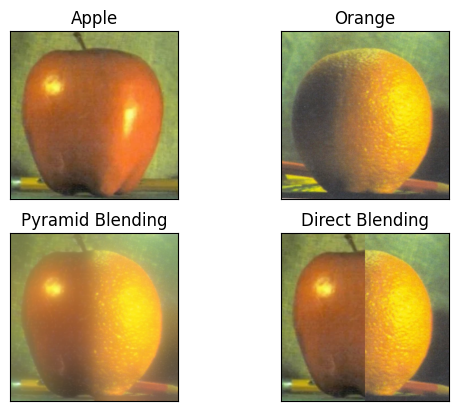

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

A = cv.imread('Images/apple.jpg')
B = cv.imread('Images/orange.jpg')

B = cv.resize(B, (A.shape[1], A.shape[0]))

# generate Gaussian pyramid for A
G = A.copy()
gpA = [G] # gpA는 Gaussian Pyramid
for i in range(6):
    G = cv.pyrDown(G) # 이미지를 1/2로 줄임
    gpA.append(G) # gpA에 추가

# generate Gaussian pyramid for B
G = B.copy()
gpB = [G] # gpB는 Gaussian Pyramid
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)

# generate Laplacian Pyramid for A
lpA = [gpA[5]] # lpA는 Laplacian Pyramid
for i in range(5, 0, -1): # 역순으로 하는 이유: 가장 작은 이미지부터 시작하기 위해
    GE = cv.pyrUp(gpA[i], dstsize=gpA[i-1].shape[:2]) # 이미지를 2배로 확대하면서 크기 지정
    L = cv.subtract(gpA[i-1], GE) # 이미지 뺄셈
    lpA.append(L) # lpA에 추가

# generate Laplacian Pyramid for B
lpB = [gpB[5]] # lpB는 Laplacian Pyramid
for i in range(5, 0, -1):
    GE = cv.pyrUp(gpB[i], dstsize=gpB[i-1].shape[:2]) # 이미지를 2배로 확대하면서 크기 지정
    L = cv.subtract(gpB[i-1], GE)
    lpB.append(L)


# Now add left and right halves of images in each level
LS = [] # LS는 Laplacian Pyramid의 합
for la, lb in zip(lpA, lpB):
    rows, cols, dpt = la.shape
    ls = np.hstack((la[:, 0:cols//2], lb[:, cols//2:])) # 왼쪽 절반과 오른쪽 절반을 합침
    LS.append(ls)
    
# now reconstruct
ls_ = LS[0]
for i in range(1, 6):
    ls_ = cv.pyrUp(ls_, dstsize=LS[i].shape[1::-1]) # 이미지를 2배로 확대하면서 목표 크기를 지정
    ls_ = cv.add(ls_, LS[i]) # 이미지 덧셈


# image with direct connecting each half
real = np.hstack((A[:, :cols//2], B[:, cols//2:]))

plt.subplot(221), plt.imshow(cv.cvtColor(A, cv.COLOR_BGR2RGB))
plt.title('Apple'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(cv.cvtColor(B, cv.COLOR_BGR2RGB))
plt.title('Orange'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(cv.cvtColor(ls_, cv.COLOR_BGR2RGB))
plt.title('Pyramid Blending'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(cv.cvtColor(real, cv.COLOR_BGR2RGB))
plt.title('Direct Blending'), plt.xticks([]), plt.yticks([])
plt.show()